<a href="https://colab.research.google.com/github/YaokunLin/ActuaryProgrammer/blob/main/VWMP_ScratchWork_forTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'start': '2020-12-28', 'end': '2021-07-15', 'granularity': 86400}
[[1626307200,31064.77,33187.6,32815.75,31868.68,11273.61174025],[1626220800,31600,33125.55,32734.14,32816.39,10355.3186961],[1626134400,32201.12,33337.61,33077.43,32734.14,9478.04218884],[1626048000,32665,34670,34259.22,33091.1,10145.24046995],[1625961600,33333.33,34607.37,33515.35,34259.23,7023.06500489],[1625875200,33027.83,34267.14,33824.25,33515.35,4906.24582215],[1625788800,32255.24,34100,32875.95,33824.26,8320.90649257],[1625702400,32111,33934.62,33879.5,32875.95,14147.3525248],[1625616000,33770.01,35077.46,34225.72,33878.56,9404.8979867],[1625529600,33300,35100,33697.78,34225.73,10313.01368118],[1625443200,33156.86,35290.82,35284.06,33697.78,9607.60619891],[1625356800,34390.53,35951,34685.03,35284.05,6224.03057033],[1625270400,33320,34953.07,33805.01,34682.16,6197.80112922],[1625184000,32704.73,33972.06,33510.93,33805.02,11765.65389836],[1625097600,32703.48,35066.54,35060,33516.11,13210.9509733],[1625011200,34033

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0da33fd90>,
      dtype=object)

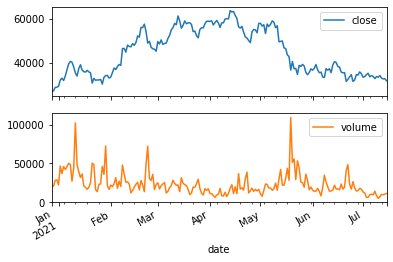

In [2]:
# Scratch work for testing purposes
# GET https://api.exchange.coinbase.com/products/{product_id}/candles

import requests
import pandas as pd
import time
from datetime import datetime, timedelta, date


pair = 'BTC-USD'
pair2 = 'ETH-USD'
pair3 = 'ETH-BTC'
windowSize = 200 #sliding window of 200 data points / max only 300 candles per requests 
#apiUrl = "https://api.exchange.coinbase.com"
apiUrl = 'https://api.pro.coinbase.com'


# work with Timeframe
timeEnd = date(2021,7,15)#date.today()#datetime.now()
delta = timedelta(days = 1) #intra-day
timeStart = timeEnd - (windowSize - 1) * delta
timeStart, timeEnd = timeStart.isoformat(), timeEnd.isoformat()
#print('timeStart: ', timeStart,' timeEnd: ', timeEnd)
# work with Timeframe

parameters = {'start':timeStart,
          'end':timeEnd,
          'granularity': 86400} 
 #The granularity field must be one of the following values: 
 #{60, 300, 900, 3600, 21600, 86400}. 
 #Otherwise, your request will be rejected. 
 #These values correspond to timeslices representing 
 #one minute, five minutes, fifteen minutes, one hour, six hours, and one day, respectively.
 

print(parameters)


response = requests.get(f"{apiUrl}/products/{pair}/candles",
                        params = parameters,
                        headers = {'content-type':'application/json'})

'''
Response Items
Each bucket is an array of the following information:

time bucket start time
low lowest price during the bucket interval
high highest price during the bucket interval
open opening price (first trade) in the bucket interval
close closing price (last trade) in the bucket interval
volume volume of trading activity during the bucket interval
'''
print(response.text)
print(len(response.text))

df = pd.DataFrame(response.json(),
                  columns = ['time', 'low', 'high', 'open', 'close', 'volume'])

df['date'] = pd.to_datetime(df['time'], unit='s')
df = df[['date', 'open', 'high', 'low', 'close', 'volume']]
df.set_index('date', inplace = True)

print(df)
print(pair)
a = sum(df['close'] * df['volume']) / sum(df['volume'])
print(windowSize,'days VWAP',a)

df[['close', 'volume']].plot.line(subplots=True)